# FAANG's Stock Market Performance
By Alvaro Rodriguez

## Business Understanding

## Data Understanding

## Data Preparation

Stock market performance analysis includes calulating close stock prices, moving averages, and measuring volatility

### Collect Real-Time Stock Market Data
Using the yfinance API, the data can be collected straight from Yahoo finance.

In [251]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

In [252]:
import pandas as pd
import numpy as np

import yfinance as yf
from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import itertools
import numpy as np
from joblib import Parallel, delayed
from matplotlib.ticker import StrMethodFormatter

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [253]:
# Start date of the stock price 12 months ago to current date
start_date = datetime(2018, 6, 1)
end_date = datetime(2023, 5, 31)

In [254]:
# Download the historical stock price data for FAANG for the last year
tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                         Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2018-06-01  193.070007  194.550003  192.070007  193.990005  193.990005  \
       2018-06-04  191.839996  193.979996  191.470001  193.279999  193.279999   
       2018-06-05  194.300003  195.000000  192.619995  192.940002  192.940002   
       2018-06-06  191.029999  192.529999  189.110001  191.339996  191.339996   
       2018-06-07  190.750000  190.970001  186.770004  188.179993  188.179993   

                     Volume  
Ticker Date                  
META   2018-06-01  17307200

### Dataframe Information

In [255]:
df

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2018-06-01  193.070007  194.550003  192.070007  193.990005  193.990005  \
       2018-06-04  191.839996  193.979996  191.470001  193.279999  193.279999   
       2018-06-05  194.300003  195.000000  192.619995  192.940002  192.940002   
       2018-06-06  191.029999  192.529999  189.110001  191.339996  191.339996   
       2018-06-07  190.750000  190.970001  186.770004  188.179993  188.179993   
...                       ...         ...         ...         ...         ...   
GOOG   2023-05-23  124.930000  125.419998  123.050003  123.290001  123.290001   
       2023-05-24  121.879997  122.750000  120.750000  121.639999  121.639999   
       2023-05-25  125.209999  125.980003  122.900002  124.349998  124.349998   
       2023-05-26  124.065002  126.000000  123.290001  125.430000  125.430000   
       2023-05-30  126.290001  126.379997  122.889999  124.639999  124.639999   

                     Volume  
Ticker Date                  
META   2018-06-01  17307200  
       2018-06-04  18939800  
       2018-06-05  15544300  
       2018-06-06  22558900  
       2018-06-07  21503200  
...                     ...  
GOOG   2023-05-23  24477900  
       2023-05-24  23087900  
       2023-05-25  33812700  
       2023-05-26  25154700  
       2023-05-30  27230700  

[6285 rows x 6 columns]

In [256]:
df.head()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2018-06-01  193.070007  194.550003  192.070007  193.990005  193.990005  \
       2018-06-04  191.839996  193.979996  191.470001  193.279999  193.279999   
       2018-06-05  194.300003  195.000000  192.619995  192.940002  192.940002   
       2018-06-06  191.029999  192.529999  189.110001  191.339996  191.339996   
       2018-06-07  190.750000  190.970001  186.770004  188.179993  188.179993   

                     Volume  
Ticker Date                  
META   2018-06-01  17307200  
       2018-06-04  18939800  
       2018-06-05  15544300  
       2018-06-06  22558900  
       2018-06-07  21503200

In [257]:
df.tail()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
GOOG   2023-05-23  124.930000  125.419998  123.050003  123.290001  123.290001  \
       2023-05-24  121.879997  122.750000  120.750000  121.639999  121.639999   
       2023-05-25  125.209999  125.980003  122.900002  124.349998  124.349998   
       2023-05-26  124.065002  126.000000  123.290001  125.430000  125.430000   
       2023-05-30  126.290001  126.379997  122.889999  124.639999  124.639999   

                     Volume  
Ticker Date                  
GOOG   2023-05-23  24477900  
       2023-05-24  23087900  
       2023-05-25  33812700  
       2023-05-26  25154700  
       2023-05-30  27230700

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6285 entries, ('META', Timestamp('2018-06-01 00:00:00')) to ('GOOG', Timestamp('2023-05-30 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6285 non-null   float64
 1   High       6285 non-null   float64
 2   Low        6285 non-null   float64
 3   Close      6285 non-null   float64
 4   Adj Close  6285 non-null   float64
 5   Volume     6285 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 355.4+ KB


In [259]:
df.describe()

Open         High          Low        Close    Adj Close   
count  6285.000000  6285.000000  6285.000000  6285.000000  6285.000000  \
mean    185.946531   188.591119   183.306143   186.000702   185.719556   
std     130.476227   132.382319   128.412753   130.418168   130.609040   
min      35.994999    36.430000    35.500000    35.547501    34.209969   
25%      92.678497    93.943001    91.529999    92.662498    92.489998   
50%     147.830002   149.399994   145.809998   147.869995   147.187943   
75%     236.059998   240.399994   231.750000   235.789993   235.789993   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  6.285000e+03  
mean   5.124448e+07  
std    5.005849e+07  
min    1.144000e+06  
25%    1.588500e+07  
50%    3.174930e+07  
75%    7.489900e+07  
max    4.265100e+08

In [260]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [261]:
df.index

MultiIndex([('META', '2018-06-01'),
            ('META', '2018-06-04'),
            ('META', '2018-06-05'),
            ('META', '2018-06-06'),
            ('META', '2018-06-07'),
            ('META', '2018-06-08'),
            ('META', '2018-06-11'),
            ('META', '2018-06-12'),
            ('META', '2018-06-13'),
            ('META', '2018-06-14'),
            ...
            ('GOOG', '2023-05-16'),
            ('GOOG', '2023-05-17'),
            ('GOOG', '2023-05-18'),
            ('GOOG', '2023-05-19'),
            ('GOOG', '2023-05-22'),
            ('GOOG', '2023-05-23'),
            ('GOOG', '2023-05-24'),
            ('GOOG', '2023-05-25'),
            ('GOOG', '2023-05-26'),
            ('GOOG', '2023-05-30')],
           names=['Ticker', 'Date'], length=6285)

In [262]:
df.shape

(6285, 6)

In [263]:
# Date column is in the index column in the DataFrame
df = df.reset_index()
df

Ticker       Date        Open        High         Low       Close   
0      META 2018-06-01  193.070007  194.550003  192.070007  193.990005  \
1      META 2018-06-04  191.839996  193.979996  191.470001  193.279999   
2      META 2018-06-05  194.300003  195.000000  192.619995  192.940002   
3      META 2018-06-06  191.029999  192.529999  189.110001  191.339996   
4      META 2018-06-07  190.750000  190.970001  186.770004  188.179993   
...     ...        ...         ...         ...         ...         ...   
6280   GOOG 2023-05-23  124.930000  125.419998  123.050003  123.290001   
6281   GOOG 2023-05-24  121.879997  122.750000  120.750000  121.639999   
6282   GOOG 2023-05-25  125.209999  125.980003  122.900002  124.349998   
6283   GOOG 2023-05-26  124.065002  126.000000  123.290001  125.430000   
6284   GOOG 2023-05-30  126.290001  126.379997  122.889999  124.639999   

       Adj Close    Volume  
0     193.990005  17307200  
1     193.279999  18939800  
2     192.940002  15544300  
3     191.339996  22558900  
4     188.179993  21503200  
...          ...       ...  
6280  123.290001  24477900  
6281  121.639999  23087900  
6282  124.349998  33812700  
6283  125.430000  25154700  
6284  124.639999  27230700  

[6285 rows x 8 columns]

### Plot Stock Market Performance

In [264]:
# Performance in the Stock Market of all the companies
import plotly.express as px
fig = px.line(df, x='Date',
             y='Close',
             color='Ticker',
             title="Stock Market Performance of FANNG for the Last Five Years")
fig.show();

In [265]:
# Faceted area chart of the companies to compare the performance of different companies
fig = px.area(df, x='Date', y='Close', color='Ticker',
             facet_col='Ticker',
             labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
             title='Stock Prices for FAANG')

fig.show();

### Analyze Moving Averages

In [266]:
# Analyze moving averages; provides a useful way to identify trends and patterns in each company's stock price movements over the year

df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
            MA10        MA20
1257         NaN         NaN
1258         NaN         NaN
1259         NaN         NaN
1260         NaN         NaN
1261         NaN         NaN
...          ...         ...
2509  173.268002  171.237000
2510  173.096002  171.641000
2511  173.020003  171.870000
2512  173.306001  172.157500
2513  173.829001  172.543001

[1257 rows x 2 columns]
Moving Averages for AMZN
            MA10        MA20
2514         NaN         NaN
2515         NaN         NaN
2516         NaN         NaN
2517         NaN         NaN
2518         NaN         NaN
...          ...         ...
3766  113.713000  109.441001
3767  114.369000  110.029501
3768  114.651000  110.288501
3769  115.636000  111.021501
3770  116.682001  112.002001

[1257 rows x 2 columns]
Moving Averages for GOOG
         MA10       MA20
5028      NaN        NaN
5029      NaN        NaN
5030      NaN        NaN
5031      NaN        NaN
5032      NaN        NaN
...       ...        ...
6280

In [267]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

The output shows four separate graphs for each company in FAANG. When the MA10 crosses above the MA20, it is considered a bullish signal.
When the MA10 rosses below the MA20, it is considered a bearish signal.

### Analyze Volatility of Each Company in FAANG

In [268]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Ticker', 
              title='Volatility of All Companies')
fig.show()

Volatility is the measure of how much and how often the stock price fluctuates over a given period of time. High volatility indicates that the stock experiences large and frequent price movements, while low volatility indicates that the market experiences smaller price movements.

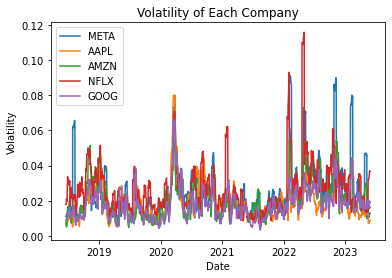

In [269]:
import matplotlib.pyplot as plt

# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Iterate over each company
for ticker in df['Ticker'].unique():
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()  # Convert to NumPy array
    dates = company_df['Date'].to_numpy()  # Convert 'Date' column to NumPy array
    plt.plot(dates, volatility_values, label=ticker)

plt.title('Volatility of Each Company')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show();

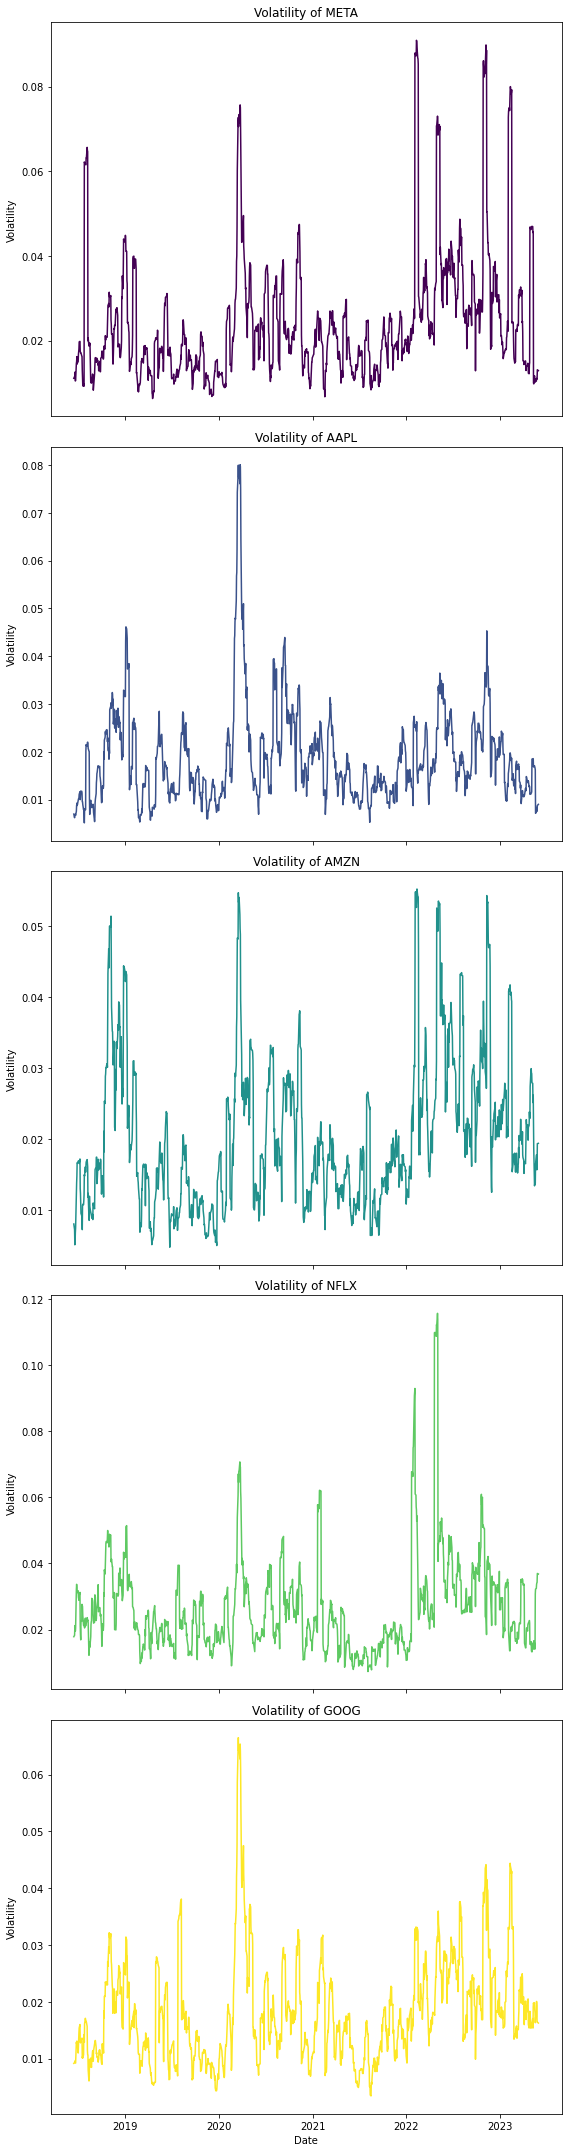

In [270]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Get unique tickers
tickers = df['Ticker'].unique()

# Determine the number of subplots based on the number of tickers
num_subplots = len(tickers)

# Create a colormap using the 'viridis' color map
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, num_subplots))

# Create subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6*num_subplots), sharex=True)

# Iterate over each ticker and plot
for i, ticker in enumerate(tickers):
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()
    dates = company_df['Date'].to_numpy()
    
    # Select the appropriate subplot
    ax = axs[i] if num_subplots > 1 else axs
    
    # Plot the data with the corresponding color
    ax.plot(dates, volatility_values, color=colors[i])
    ax.set_title(f'Volatility of {ticker}')
    ax.set_ylabel('Volatility')

# Set the common x-axis label
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## EDA

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      6285 non-null   object        
 1   Date        6285 non-null   datetime64[ns]
 2   Open        6285 non-null   float64       
 3   High        6285 non-null   float64       
 4   Low         6285 non-null   float64       
 5   Close       6285 non-null   float64       
 6   Adj Close   6285 non-null   float64       
 7   Volume      6285 non-null   int64         
 8   MA10        6240 non-null   float64       
 9   MA20        6190 non-null   float64       
 10  Volatility  6235 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 540.2+ KB


In [272]:
df.set_index('Date', inplace=True)

In [273]:
fig = px.line(df, x=df.index, y='Close', color='Ticker', title='Stock Prices Over Time')
fig.show();

### 5 Year Return Model

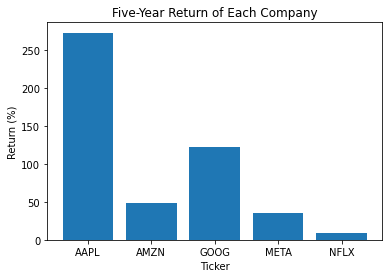

In [274]:
returns = (df.groupby('Ticker')['Close'].last() / df.groupby('Ticker')['Close'].first() - 1) * 100

plt.bar(returns.index, returns)
plt.xlabel('Ticker')
plt.ylabel('Return (%)')
plt.title('Five-Year Return of Each Company')
plt.show()

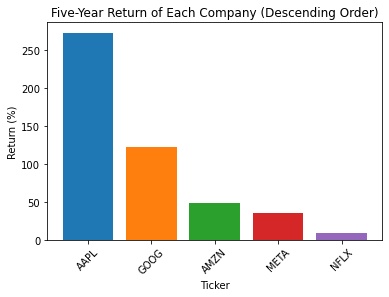

In [275]:
returns_sorted = returns.sort_values(ascending=False)
colors = plt.cm.tab10(range(len(returns_sorted)))

plt.bar(returns_sorted.index, returns_sorted, color=colors)
plt.xlabel('Ticker')
plt.ylabel('Return (%)')
plt.title('Five-Year Return of Each Company (Descending Order)')
plt.xticks(rotation=45)
plt.show()

Apple currently has the highest return of 5 years from all the FAANG companies. Since it has the highest return, we will be focusing more on Apple than each company.

### Time-Series Line Plot

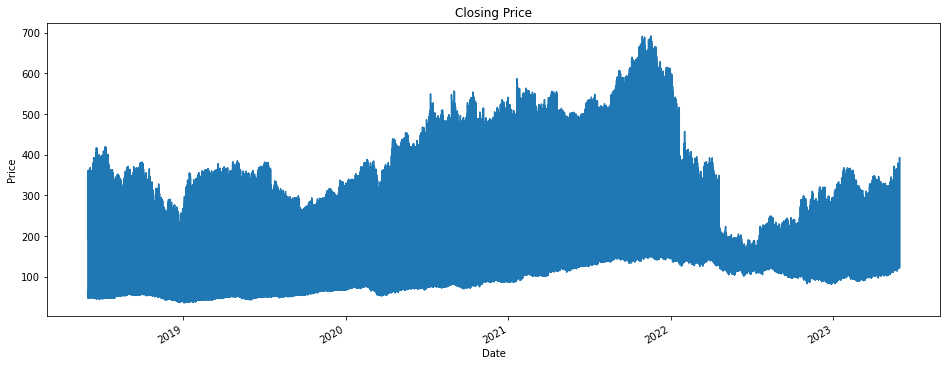

In [276]:
import matplotlib.pyplot as plt
%matplotlib inline

# ALL THE COMPANIES
df['Close'].plot(figsize=(16, 6))
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

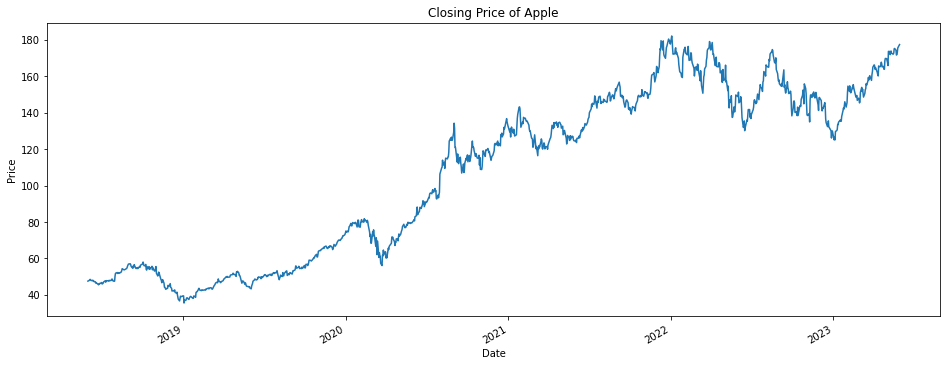

In [277]:
# Filter the DataFrame to include only Apple data
apple_df = df[df['Ticker'] == 'AAPL']

# Plot the closing price of Apple
apple_df['Close'].plot(figsize=(16, 6))
plt.title('Closing Price of Apple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Time-series Dot Plot

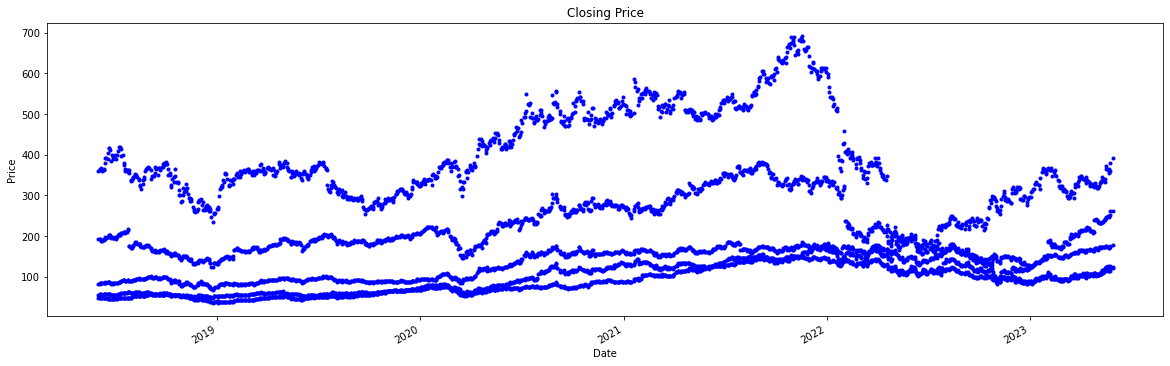

In [278]:
df['Close'].plot(figsize=(20, 6), style= '.b')
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

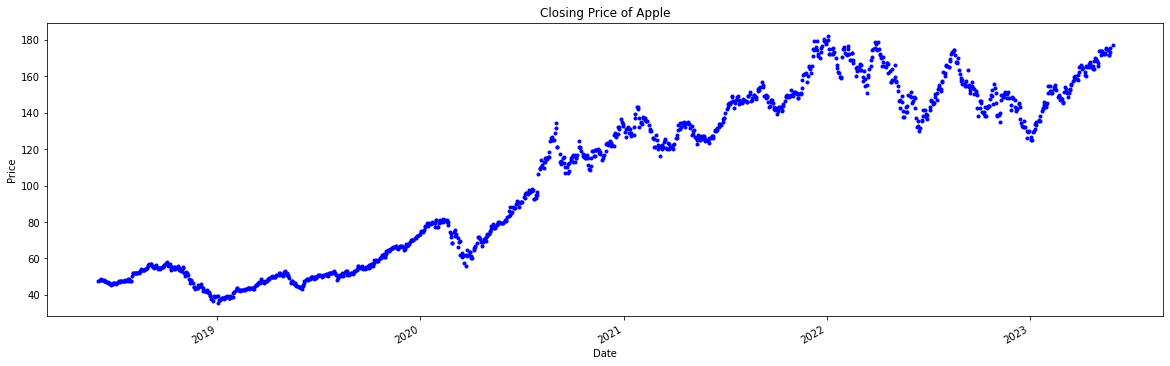

In [279]:
apple_df['Close'].plot(figsize=(20, 6), style='.b')
plt.title('Closing Price of Apple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Separated Annual Yearly Percentage Change

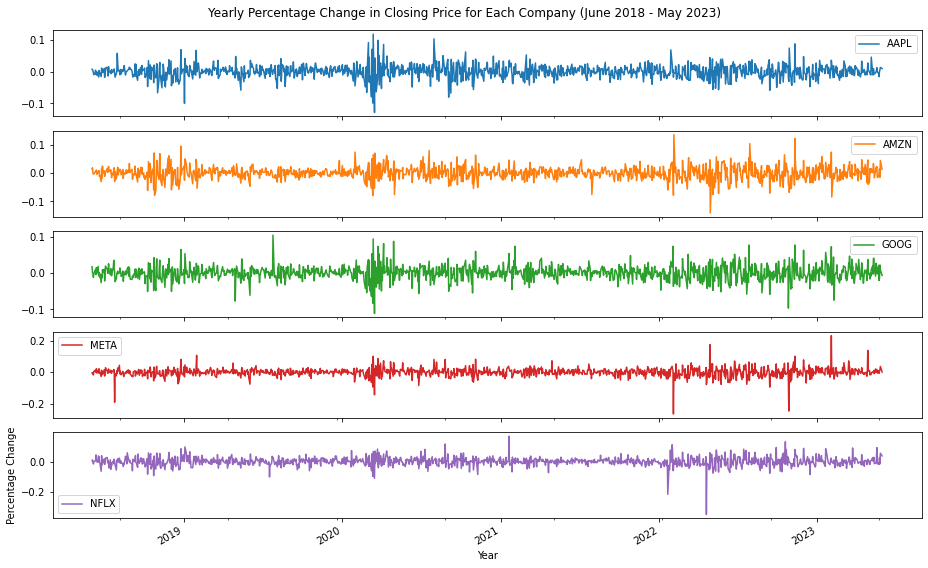

In [280]:
df_filtered = df.loc[(df.index.get_level_values('Date') >= start_date) & (df.index.get_level_values('Date') <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index.get_level_values('Date'))
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot the annual percentage changes as subplots
df_annual_pct_change.plot(figsize=(13, 8), subplots=True, legend=True)

# Set the plot title and labels
plt.suptitle('Yearly Percentage Change in Closing Price for Each Company (June 2018 - May 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();

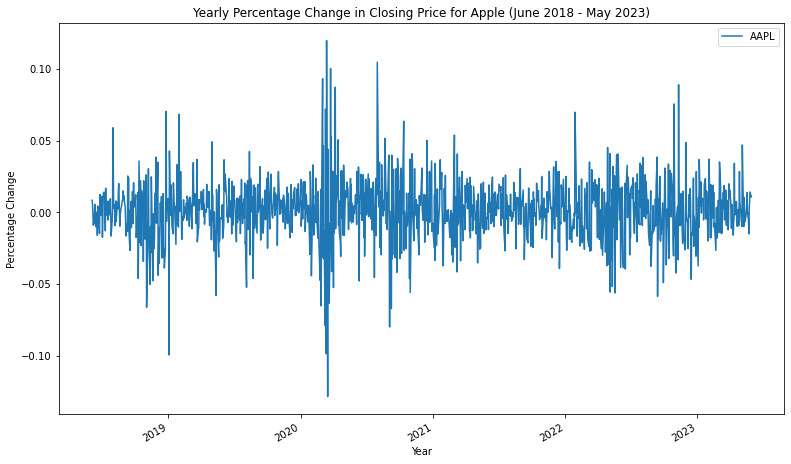

In [281]:
# Select only the column corresponding to Apple (AAPL)
apple_pct_change = df_annual_pct_change['AAPL']

# Plot the annual percentage change of Apple
apple_pct_change.plot(figsize=(13, 8), legend=True)

# Set the plot title and labels
plt.title('Yearly Percentage Change in Closing Price for Apple (June 2018 - May 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')

# Display the plot
plt.show();

### Histogram

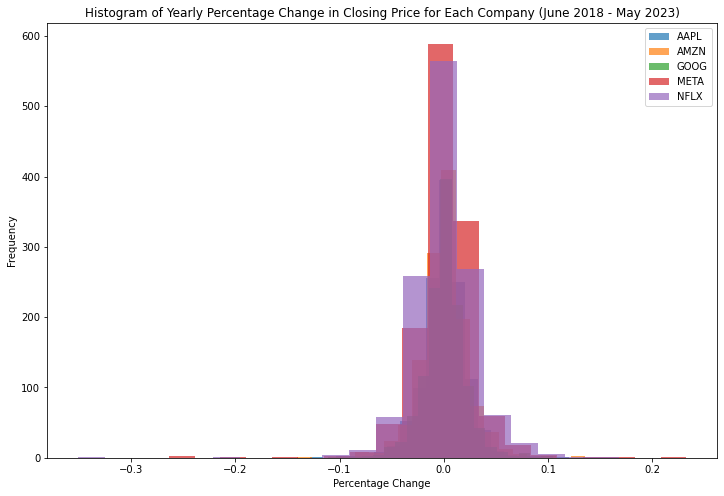

In [282]:
# Plot a histogram for each company
plt.figure(figsize=(12, 8))
for column in df_annual_pct_change.columns:
    plt.hist(df_annual_pct_change[column].dropna(), bins=20, alpha=0.7, label=column)

# Set the plot title and labels
plt.title('Histogram of Yearly Percentage Change in Closing Price for Each Company (June 2018 - May 2023)')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show();

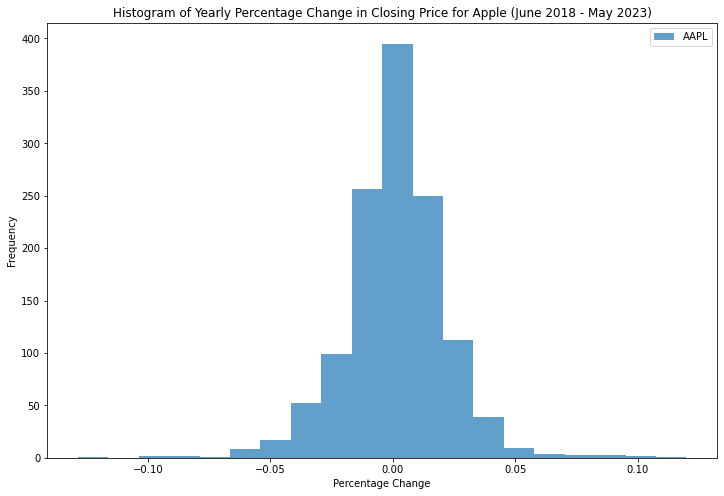

In [283]:
# Plot a histogram for Apple (AAPL) only
plt.figure(figsize=(12, 8))
plt.hist(df_annual_pct_change['AAPL'].dropna(), bins=20, alpha=0.7, label='AAPL')

# Set the plot title and labels
plt.title('Histogram of Yearly Percentage Change in Closing Price for Apple (June 2018 - May 2023)')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show();

The histogram illustrates the distribution of yearly percentage changes in the closing prices of different companies' stocks within the specified time range (June 2018 - May 2023). Each histogram represents a specific company, identified by its ticker symbol. 

The x-axis of the histogram represents the range of percentage changes, while the y-axis represents the frequency or count of occurrences for each range. The histogram is divided into bins, where each bin represents a range of percentage changes. The height of each bar in the histogram indicates the number of instances falling within that range.

By analyzing the histogram, we can gain insights into the volatility and distribution of price changes for each company during the given period. A wider and more spread-out distribution suggests higher price volatility, while a narrower distribution indicates more stable price behavior. Additionally, we can identify any patterns or outliers in the data that might be worth investigating further.

### Density Plot 

In [284]:
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

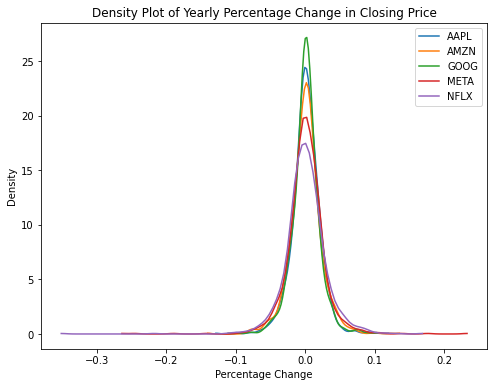

In [285]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over each group and create separate density plots
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)

    # Compute the kernel density estimate
    kde = gaussian_kde(pct_change.dropna())

    # Generate x-values for the density plot
    x = np.linspace(pct_change.min(), pct_change.max(), num=100)

    # Plot the density line for the current company
    ax.plot(x, kde(x), label=ticker)

# Set the plot title and labels
ax.set_title('Density Plot of Yearly Percentage Change in Closing Price')
ax.set_xlabel('Percentage Change')
ax.set_ylabel('Density')

# Add a legend
ax.legend()

# Display the plot
plt.show();

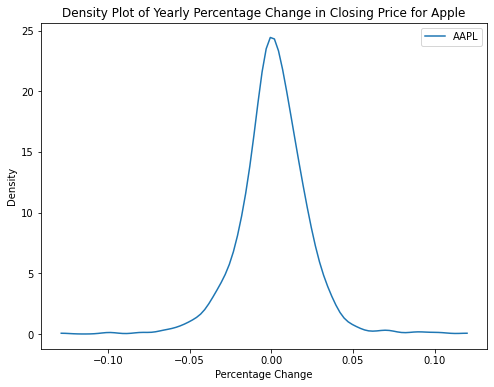

In [286]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the percentage change of the closing prices for Apple (AAPL)
pct_change_apple = df_annual_pct_change['AAPL'].dropna()

# Compute the kernel density estimate for Apple (AAPL)
kde = gaussian_kde(pct_change_apple)

# Generate x-values for the density plot
x = np.linspace(pct_change_apple.min(), pct_change_apple.max(), num=100)

# Plot the density line for Apple (AAPL)
ax.plot(x, kde(x), label='AAPL')

# Set the plot title and labels
ax.set_title('Density Plot of Yearly Percentage Change in Closing Price for Apple')
ax.set_xlabel('Percentage Change')
ax.set_ylabel('Density')

# Add a legend
ax.legend()

# Display the plot
plt.show();

it seems that the density plot for the yearly percentage change in closing price of Apple (AAPL) exhibits a peak around 25 on the x-axis, indicating a relatively high concentration or likelihood of occurrence for percentage change values around that point. The distribution appears to be roughly symmetric, with the data being evenly distributed within the range of approximately -14% to 14% on the x-axis.

The peak around 25 suggests that there may have been periods of relatively higher yearly percentage increases in the closing price of Apple stock during the analyzed time period. The even distribution of data within the range of -14% to 14% indicates that there is no strong skewness or bias towards positive or negative percentage changes, and the occurrences are spread out relatively evenly across that range.

### Box Plot
- Shows distributiions of the closing price of each company in FAANG

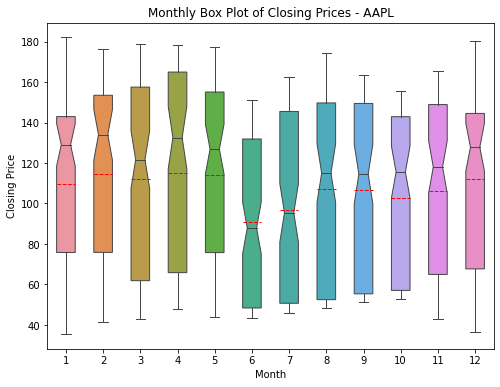

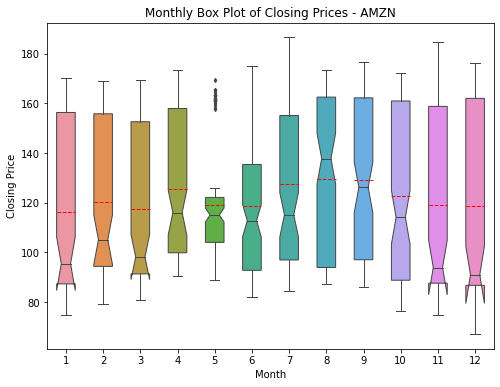

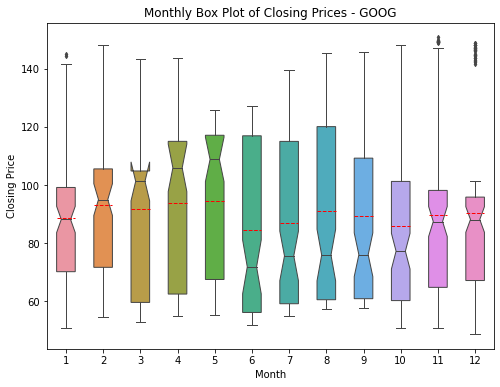

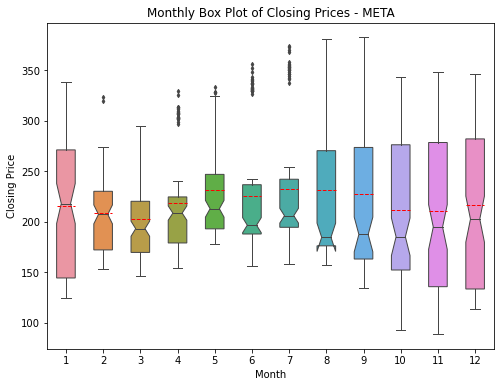

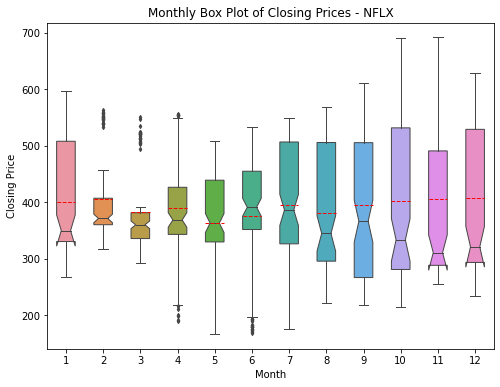

In [287]:
# Set the desired time range
start_date = pd.to_datetime('2018-06-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker'
groups = df_filtered.groupby('Ticker')

# Iterate over each group and create a separate box plot for each company
for ticker, group in groups:
    # Create a new figure and axis for each company
    fig, ax = plt.subplots(figsize=(8, 6))

    # Extract the closing prices for the current company
    closing_prices = group['Close']

    # Create the box plot for the current company
    sns.boxplot(x=group.index.month, y=closing_prices, ax=ax, width=0.5, linewidth=1, fliersize=3, whis=1.5, notch=True, showfliers=True, showmeans=True, meanline=True, meanprops={'color': 'red', 'linestyle': '--'})

    # Set the plot title and labels
    ax.set_title(f'Monthly Box Plot of Closing Prices - {ticker}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Closing Price')

    # Display the plot
    plt.show();

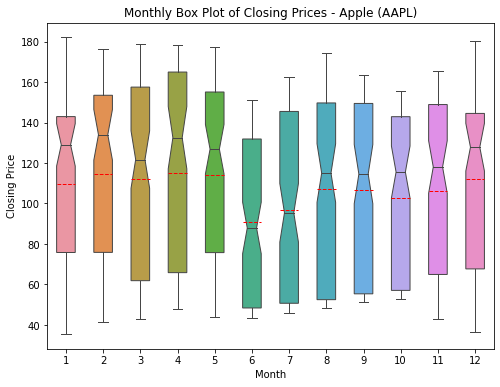

In [288]:
# Filter the DataFrame for Apple (AAPL) only
df_apple = df_filtered[df_filtered['Ticker'] == 'AAPL']

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Extract the closing prices for Apple
closing_prices = df_apple['Close']

# Create the box plot for Apple
sns.boxplot(x=df_apple.index.month, y=closing_prices, ax=ax, width=0.5, linewidth=1, fliersize=3, whis=1.5, notch=True, showfliers=True, showmeans=True, meanline=True, meanprops={'color': 'red', 'linestyle': '--'})

# Set the plot title and labels
ax.set_title('Monthly Box Plot of Closing Prices - Apple (AAPL)')
ax.set_xlabel('Month')
ax.set_ylabel('Closing Price')

# Display the plot
plt.show();

### Heat Maps

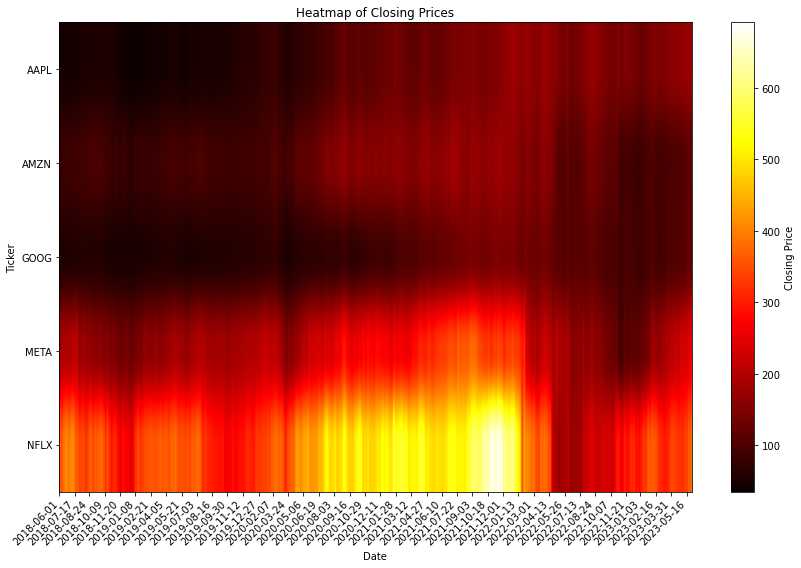

In [289]:
import matplotlib.dates as mdates

# Pivot the DataFrame to have 'Ticker' as columns and 'Date' as index
pivot_df = df_filtered.pivot(columns='Ticker', values='Close')

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivot_df.values.T, cmap='hot', aspect='auto')

# Set the x-axis tick labels and positions
x_ticks = range(len(pivot_df.index))
x_tick_labels = pivot_df.index.strftime('%Y-%m-%d')  # Format dates as desired
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust tick frequency if needed

# Set the y-axis tick labels and positions
y_ticks = range(len(pivot_df.columns))
y_tick_labels = pivot_df.columns
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

# Set the colorbar
plt.colorbar(im, label='Closing Price')

# Set the plot title and labels
plt.title('Heatmap of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show();

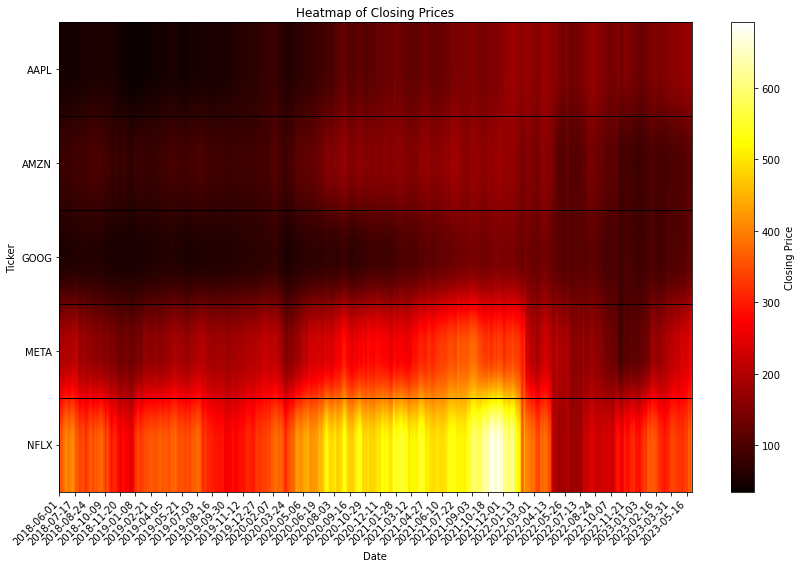

In [290]:
from matplotlib.patches import Rectangle

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivot_df.values.T, cmap='hot', aspect='auto')

# Set the x-axis tick labels and positions
x_ticks = range(len(pivot_df.index))
x_tick_labels = pivot_df.index.strftime('%Y-%m-%d')  # Format dates as desired
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust tick frequency if needed

# Set the y-axis tick labels and positions
y_ticks = range(len(pivot_df.columns))
y_tick_labels = pivot_df.columns
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

# Add boxes for each company
for i in range(len(pivot_df.columns)):
    rect = Rectangle((-0.5, i - 0.5), len(pivot_df.index), 1, facecolor='none', edgecolor='black')
    ax.add_patch(rect)

# Set the colorbar
plt.colorbar(im, label='Closing Price')

# Set the plot title and labels
plt.title('Heatmap of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show();

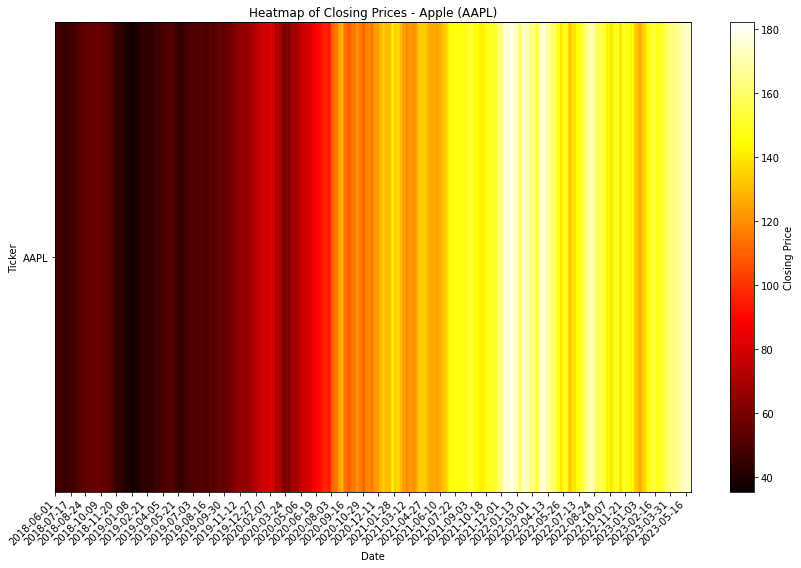

In [291]:
# Create the heatmap for Apple
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivot_df['AAPL'].values.reshape(1, -1), cmap='hot', aspect='auto')

# Set the x-axis tick labels and positions
x_ticks = range(len(pivot_df.index))
x_tick_labels = pivot_df.index.strftime('%Y-%m-%d')  # Format dates as desired
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust tick frequency if needed

# Set the y-axis tick labels and positions
y_ticks = [0]  # Only one company, so set a single tick position
y_tick_labels = ['AAPL']  # Set the label for Apple
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

# Add a box for Apple
rect = Rectangle((-0.5, -0.5), len(pivot_df.index), 1, facecolor='none', edgecolor='black')
ax.add_patch(rect)

# Set the colorbar
plt.colorbar(im, label='Closing Price')

# Set the plot title and labels
plt.title('Heatmap of Closing Prices - Apple (AAPL)')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show();

### Check for Stationarity 

In [292]:
# Filter the DataFrame for the desired time range
df_filtered_AP = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Select the closing price of a specific company for the time series analysis
company_ticker = 'AAPL'
time_series = df_filtered[df_filtered['Ticker'] == company_ticker]['Close']

# Perform the Augmented Dickey-Fuller test
result_AP = adfuller(time_series)
print(result_AP)

(-0.651976488168687, 0.8587997952960009, 1, 1255, {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}, 5581.2426582955395)


In [293]:
# Perform the Augmented Dickey-Fuller test
result_AP = adfuller(time_series)

# Print the full result with labels
print("ADF Statistic:", result_AP[0])
print("p-value:", result_AP[1])
print("Critical Values:")
for key, value in result_AP[4].items():
    print(f"{key} (at {value} critical value): {result_AP[4][key]}")
print("Is Stationary:", result_AP[1] < 0.05)

ADF Statistic: -0.651976488168687
p-value: 0.8587997952960009
Critical Values:
1% (at -3.435571295403709 critical value): -3.435571295403709
5% (at -2.863845736356174 critical value): -2.863845736356174
10% (at -2.567997600196822 critical value): -2.567997600196822
Is Stationary: False


### DIfference Transformation

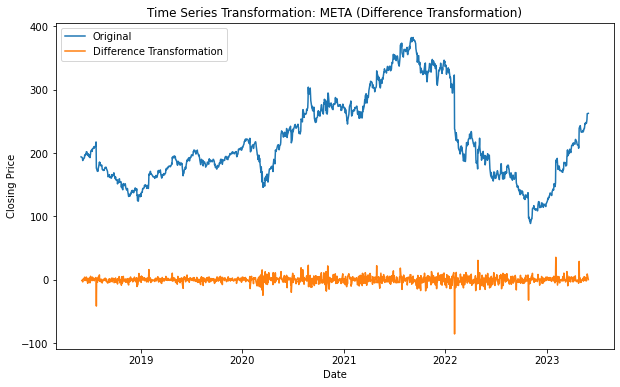

Augmented Dickey-Fuller Test: META (Difference Transformation)
Test Statistic: -21.68140684314075
P-value: 0.0
Critical Values: {'1%': -3.4355796466416777, '5%': -2.863849421064024, '10%': -2.5679995625056926}



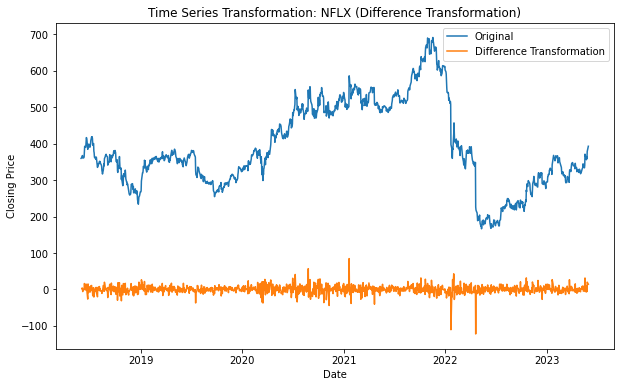

Augmented Dickey-Fuller Test: NFLX (Difference Transformation)
Test Statistic: -36.755241543402065
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}



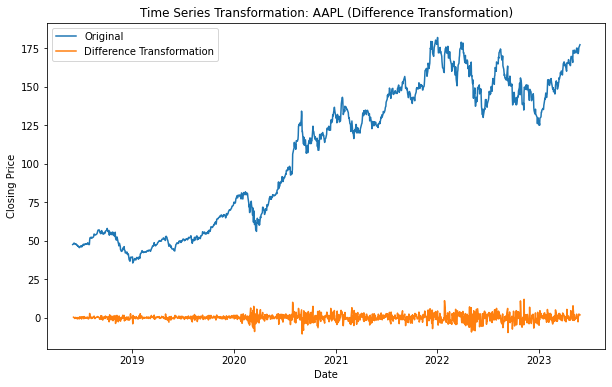

Augmented Dickey-Fuller Test: AAPL (Difference Transformation)
Test Statistic: -37.38906184794579
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}



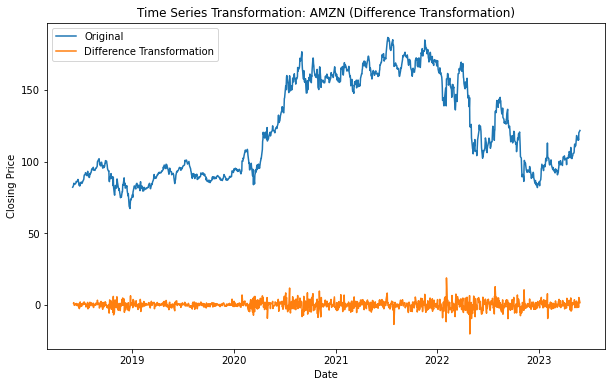

Augmented Dickey-Fuller Test: AMZN (Difference Transformation)
Test Statistic: -36.25872299152099
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}



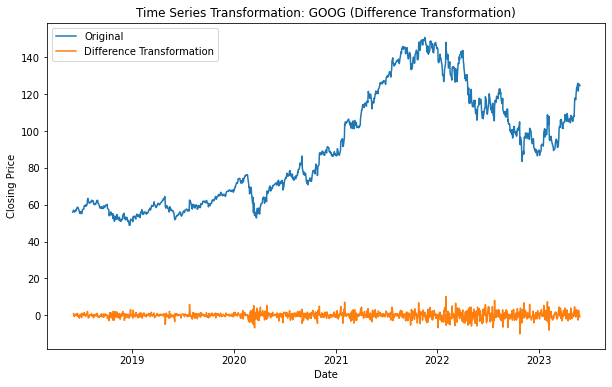

Augmented Dickey-Fuller Test: GOOG (Difference Transformation)
Test Statistic: -37.24110705598108
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}



In [294]:
# Define the list of company tickers
company_tickers = ['META', 'NFLX', 'AAPL', 'AMZN', 'GOOG']  # Replace with actual company tickers

# Iterate over each company ticker
for ticker in company_tickers:
    # Select the closing price of the current company for the time series analysis
    time_series = df_filtered[df_filtered['Ticker'] == ticker]['Close']
    
    # Perform the first difference transformation on the series
    diff_series = time_series.diff().dropna()
    
    # Perform the Augmented Dickey-Fuller test on the differenced series
    result_diff = adfuller(diff_series)
    
    # Plot the original and differenced series
    plt.figure(figsize=(10, 6))
    plt.plot(time_series, label='Original')
    plt.plot(diff_series, label='Difference Transformation')
    plt.title(f'Time Series Transformation: {ticker} (Difference Transformation)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()
    
    # Print the Augmented Dickey-Fuller test result
    print(f'Augmented Dickey-Fuller Test: {ticker} (Difference Transformation)')
    print(f'Test Statistic: {result_diff[0]}')
    print(f'P-value: {result_diff[1]}')
    print(f'Critical Values: {result_diff[4]}')
    print('')

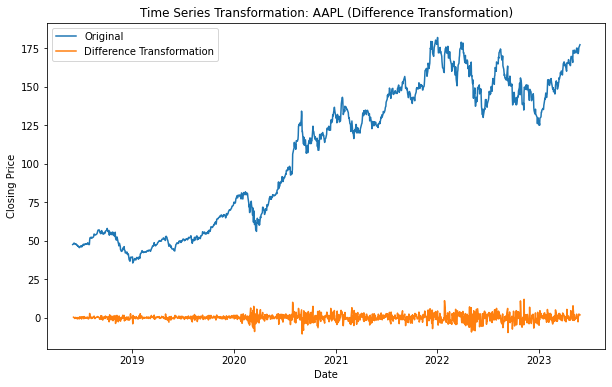

Augmented Dickey-Fuller Test: AAPL (Difference Transformation)
Test Statistic: -37.38906184794579
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}


In [295]:
# Select the closing price of Apple for the time series analysis
time_series = df_filtered[df_filtered['Ticker'] == 'AAPL']['Close']

# Perform the first difference transformation on the series
diff_series = time_series.diff().dropna()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(diff_series)

# Plot the original and differenced series
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original')
plt.plot(diff_series, label='Difference Transformation')
plt.title('Time Series Transformation: AAPL (Difference Transformation)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Print the Augmented Dickey-Fuller test result
print('Augmented Dickey-Fuller Test: AAPL (Difference Transformation)')
print(f'Test Statistic: {result_diff[0]}')
print(f'P-value: {result_diff[1]}')
print(f'Critical Values: {result_diff[4]}')

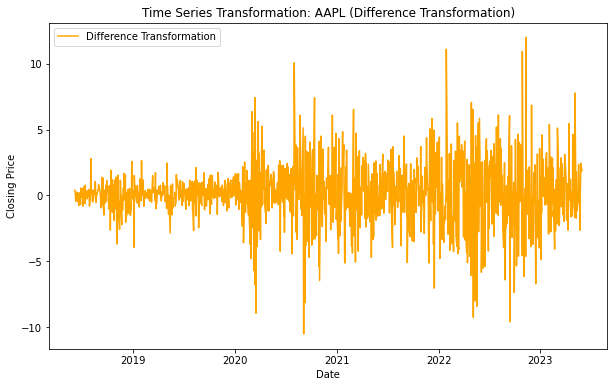

Augmented Dickey-Fuller Test: AAPL (Difference Transformation)
Test Statistic: -37.38906184794579
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}


In [296]:
# Select the closing price of Apple for the time series analysis
time_series = df_filtered[df_filtered['Ticker'] == 'AAPL']['Close']

# Perform the first difference transformation on the series
diff_series = time_series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(diff_series, label='Difference Transformation', color='orange')
plt.title('Time Series Transformation: AAPL (Difference Transformation)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(diff_series)

# Print the Augmented Dickey-Fuller test result
print('Augmented Dickey-Fuller Test: AAPL (Difference Transformation)')
print(f'Test Statistic: {result_diff[0]}')
print(f'P-value: {result_diff[1]}')
print(f'Critical Values: {result_diff[4]}')

The test statistic value of -37.38906184794579 is highly significant, and the p-value of 0.0 indicates strong evidence against the null hypothesis of a unit root in the differenced series. Therefore, we can conclude that the difference-transformed series of Apple's closing prices is stationary.

The critical values provide a comparison to the test statistic. If the test statistic is lower than the critical values at a certain significance level (1%, 5%, or 10%), we can reject the null hypothesis. In this case, the test statistic is far lower than all the critical values, further supporting the rejection of the null hypothesis and the presence of stationarity in the differenced series.

## Model

In [297]:
## FOCUS JUST ON APPLE

### Train-Test Split

In [298]:
apple_prices = df_filtered[df_filtered['Ticker'] == 'AAPL']['Close']

In [299]:
split_index = int(len(apple_prices) * 0.9)

In [300]:
train_data = apple_prices[:split_index]
test_data = apple_prices[split_index:]

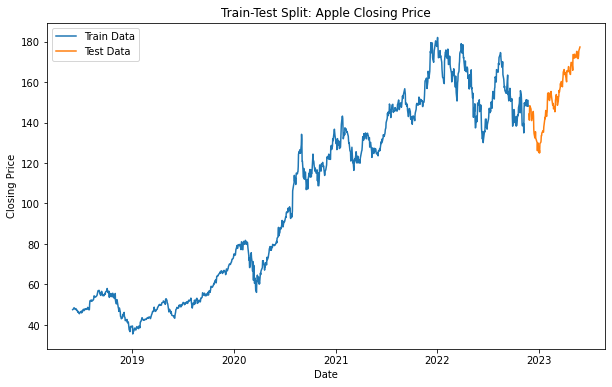

In [301]:
# Plot the train and test data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.title('Train-Test Split: Apple Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show();

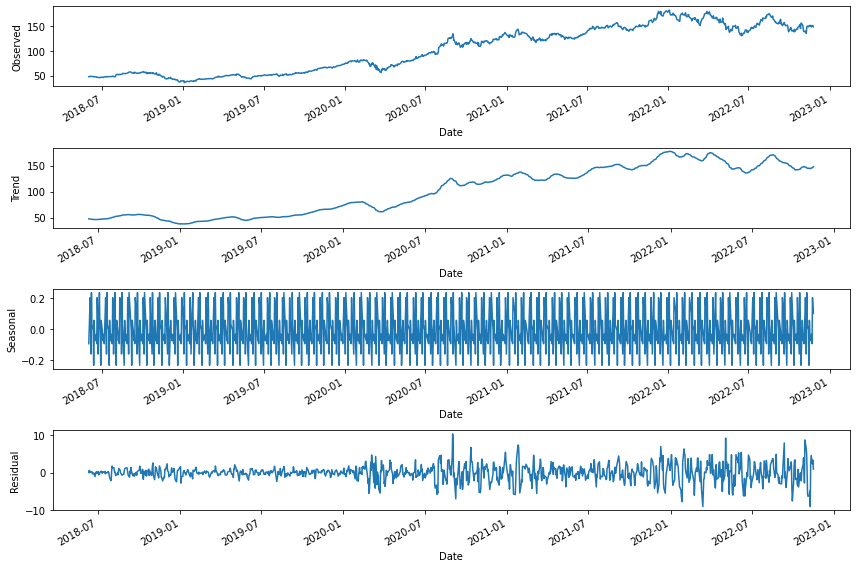

In [302]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on the train data
decomposition = seasonal_decompose(train_data, model='additive', period=12)  # Adjust the period based on the seasonality of your data

# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

### Baseline Model

In [303]:
train_data

Date
2018-06-01     47.560001
2018-06-04     47.957500
2018-06-05     48.327499
2018-06-06     48.494999
2018-06-07     48.365002
                 ...    
2022-11-18    151.289993
2022-11-21    148.009995
2022-11-22    150.179993
2022-11-23    151.070007
2022-11-25    148.110001
Name: Close, Length: 1131, dtype: float64

In [304]:
naive = train_data.shift(1)
naive

Date
2018-06-01           NaN
2018-06-04     47.560001
2018-06-05     47.957500
2018-06-06     48.327499
2018-06-07     48.494999
                 ...    
2022-11-18    150.720001
2022-11-21    151.289993
2022-11-22    148.009995
2022-11-23    150.179993
2022-11-25    151.070007
Name: Close, Length: 1131, dtype: float64

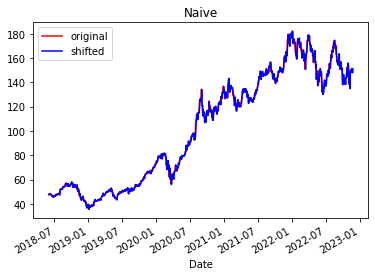

In [305]:
fig, ax = plt.subplots()

train_data.plot(ax=ax, c='r', label='original')
naive.plot(ax=ax, c='b', label='shifted')
ax.set_title('Naive')
ax.legend();

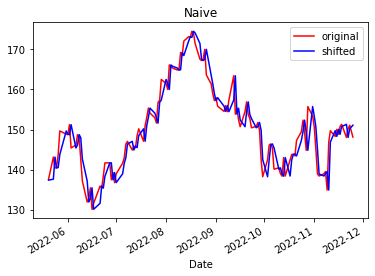

In [306]:
fig, ax = plt.subplots()

train_data[1000:1131].plot(ax=ax, c='r', label='original')
naive[1000:1131].plot(ax=ax, c='b', label='shifted')
ax.set_title('Naive')
ax.legend();

In [307]:
mean_squared_error(train_data[1:], naive.dropna(), squared=False)

2.299365945451646

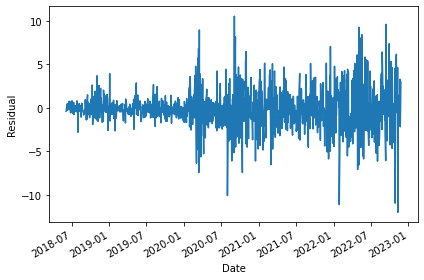

In [308]:
residuals = naive[1:] - train_data[1:]

# Plot the residuals
fig, ax = plt.subplots()
residuals.plot(ax=ax)
ax.set_ylabel('Residual')
plt.tight_layout()
plt.show()

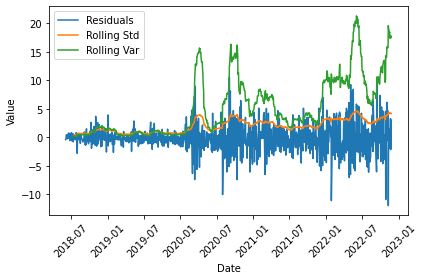

In [309]:
fig, ax = plt.subplots()

# Plot residuals
ax.plot(residuals.index.to_numpy(), residuals.to_numpy(), label='Residuals')

# Calculate rolling standard deviation and variance
rolling_std = residuals.rolling(30).std()
rolling_var = residuals.rolling(30).var()

# Plot rolling standard deviation
ax.plot(rolling_std.index.to_numpy(), rolling_std.to_numpy(), label='Rolling Std')

# Plot rolling variance
ax.plot(rolling_var.index.to_numpy(), rolling_var.to_numpy(), label='Rolling Var')

# Rotate x-axis tick labels
plt.xticks(rotation=45)

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.tight_layout()
plt.show()

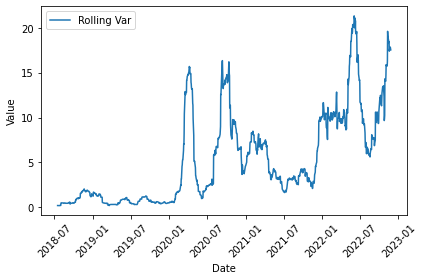

In [310]:
# Plot rolling variance
fig, ax = plt.subplots()

ax.plot(rolling_var.index.to_numpy(), rolling_var.to_numpy(), label='Rolling Var')

plt.xticks(rotation=45)

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.tight_layout()
plt.show()

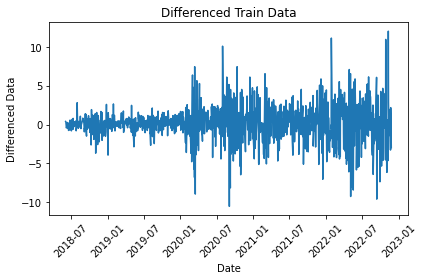

In [311]:
# Calculate differenced data
differenced_data = train_data.diff().dropna()

# Plot differenced data
fig, ax = plt.subplots()
ax.plot(differenced_data.index.to_numpy(), differenced_data.to_numpy())

plt.xticks(rotation=45)

ax.set_title('Differenced Train Data')
ax.set_xlabel('Date')
ax.set_ylabel('Differenced Data')

plt.tight_layout()
plt.show()

### Difference Stationary

In [312]:
adfuller(differenced_data[1:])

(-9.784284966131407,
 6.60673178296799e-17,
 10,
 1118,
 {'1%': -3.4362125920049498,
  '5%': -2.8641286575615426,
  '10%': -2.5681482759591785},
 4996.827720582122)

In [313]:
test_statistic = adfuller(differenced_data[1:])[0]
p_val = adfuller(differenced_data[1:])[1]

print(f"Test Statistic: {test_statistic}")
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")

# Interpret the results
if p_val < 0.05:
    print("The difference data is stationary (reject the null hypothesis)")
else:
    print("The difference data is non-stationary (fail to reject the null hypothesis)")

Test Statistic: -9.784284966131407
The p-value associated with the Dickey-Fuller statistical test is 6.60673178296799e-17,
The difference data is stationary (reject the null hypothesis)


# The Autoregressive Model (AR)

In [314]:
from statsmodels.tsa.ar_model import AutoReg


In [315]:
lag_order = 5

In [316]:
train_data.index.freq = pd.infer_freq(train_data.index)

In [317]:
ar_model = AutoReg(train_data, lags=lag_order).fit()

In [318]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1131
Model:                     AutoReg(5)   Log Likelihood               -2532.522
Method:               Conditional MLE   S.D. of innovations              2.294
Date:                Fri, 09 Jun 2023   AIC                           5079.044
Time:                        18:49:42   BIC                           5114.229
Sample:                             5   HQIC                          5092.340
                                 1131                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2367      0.169      1.402      0.161      -0.094       0.568
Close.L1       0.9293      0.030     31.160      0.000       0.871       0.988
Close.L2       0.0395      0.041      0.971      0.332      -0.040       0.119
Close.L3       0.0020      0.041      0.049      0.961      -0.078       0.082
Close.L4       0.0313      0.041      0.767      0.443      -0.049       0.111
Close.L5      -0.0034      0.030     -0.114      0.909      -0.062       0.055
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2           -3.0305           -0.0000j            3.0305           -0.5000
AR.3            0.7865           -3.0694j            3.1685           -0.2101
AR.4            0.7865           +3.0694j            3.1685            0.2101
AR.5            9.6375           -0.0000j            9.6375           -0.0000
-----------------------------------------------------------------------------
"""

In [319]:
coefficients = ar_model.params
coefficients

const       0.236678
Close.L1    0.929279
Close.L2    0.039525
Close.L3    0.001991
Close.L4    0.031274
Close.L5   -0.003406
dtype: float64

In [320]:
ar_model.predict()

Date
2018-06-01   NaN
2018-06-04   NaN
2018-06-05   NaN
2018-06-06   NaN
2018-06-07   NaN
              ..
2022-11-18   NaN
2022-11-21   NaN
2022-11-22   NaN
2022-11-23   NaN
2022-11-25   NaN
Length: 1131, dtype: float64

In [321]:
ar_1= ARIMA(train_data, order=(1, 1, 0)).fit()

In [322]:
ar_1.predict()

Date
2018-06-01      0.000000
2018-06-04     47.559985
2018-06-05     47.931374
2018-06-06     48.303180
2018-06-07     48.483990
                 ...    
2022-11-18    150.593147
2022-11-21    151.252529
2022-11-22    148.225580
2022-11-23    150.037365
2022-11-25    151.011509
Name: predicted_mean, Length: 1131, dtype: float64

In [323]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1131
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2541.832
Date:                Fri, 09 Jun 2023   AIC                           5087.664
Time:                        18:49:42   BIC                           5097.724
Sample:                             0   HQIC                          5091.464
                               - 1131                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0657      0.021     -3.097      0.002      -0.107      -0.024
sigma2         5.2643      0.138     38.024      0.000       4.993       5.536
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               511.03
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              11.94   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [324]:
ar_1.aic

5087.663643078866

### Random Walk Model

In [325]:
rwm = ARIMA(train_data, order=(0, 1, 0)).fit()
rwm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2544.276
Date:                Fri, 09 Jun 2023   AIC                           5090.553
Time:                        18:49:42   BIC                           5095.583
Sample:                             0   HQIC                          5092.453
                               - 1131                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.2871      0.135     39.132      0.000       5.022       5.552
===================================================================================
Ljung-Box (L1) (Q):                   5.14   Jarque-Bera (JB):               556.62
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              11.94   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [326]:
print(f'Random Walk AIC: {rwm.aic}')
print(f'AR(1, 1, 0) AIC: {ar_1.aic}' )

Random Walk AIC: 5090.552589480249
AR(1, 1, 0) AIC: 5087.663643078866


In [327]:
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train_data, y_hat_ar1, squared=False)

2.6943540253952434

In [328]:
y_hat_rw = rwm.predict(typ='levels')
np.sqrt(mean_squared_error(train_data, y_hat_rw))

2.6985863229999105

RMSE for model AR(1) is lower than the RMSE for the random walk model by approximately 0.004.

### Cross-Validation

In [329]:
train_data

Date
2018-06-01     47.560001
2018-06-04     47.957500
2018-06-05     48.327499
2018-06-06     48.494999
2018-06-07     48.365002
                 ...    
2022-11-18    151.289993
2022-11-21    148.009995
2022-11-22    150.179993
2022-11-23    151.070007
2022-11-25    148.110001
Name: Close, Length: 1131, dtype: float64

In [330]:
train_data.index

DatetimeIndex(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-06',
               '2018-06-07', '2018-06-08', '2018-06-11', '2018-06-12',
               '2018-06-13', '2018-06-14',
               ...
               '2022-11-11', '2022-11-14', '2022-11-15', '2022-11-16',
               '2022-11-17', '2022-11-18', '2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-25'],
              dtype='datetime64[ns]', name='Date', length=1131, freq=None)

In [331]:
train_w_ind = train_data.reset_index()
train_w_ind

Date       Close
0    2018-06-01   47.560001
1    2018-06-04   47.957500
2    2018-06-05   48.327499
3    2018-06-06   48.494999
4    2018-06-07   48.365002
...         ...         ...
1126 2022-11-18  151.289993
1127 2022-11-21  148.009995
1128 2022-11-22  150.179993
1129 2022-11-23  151.070007
1130 2022-11-25  148.110001

[1131 rows x 2 columns]

In [332]:
# sklearn.model_selection.TimeSeriesSplit
split = TimeSeriesSplit()

In [333]:
split

TimeSeriesSplit(max_train_size=None, n_splits=5)

In [334]:
for train_ind, val_ind in split.split(train_w_ind):
    print(train_ind, val_ind)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190] [191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 

In [335]:
train_w_ind.iloc[train_ind, -1]

0       47.560001
1       47.957500
2       48.327499
3       48.494999
4       48.365002
          ...    
938    164.320007
939    160.070007
940    162.740005
941    164.850006
942    165.119995
Name: Close, Length: 943, dtype: float64

In [336]:
for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

10.996979145317413
22.477454007927623
8.897562496987504
32.676760174315724
16.161435521670583


In [337]:
fold_number = 1

for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    rmse = np.sqrt(mean_squared_error(true, preds))
    print(f"Fold {fold_number}: RMSE = {rmse}")
    fold_number += 1

Fold 1: RMSE = 10.996979145317413
Fold 2: RMSE = 22.477454007927623
Fold 3: RMSE = 8.897562496987504
Fold 4: RMSE = 32.676760174315724
Fold 5: RMSE = 16.161435521670583


### Comparison with Linear Regression

In [338]:
from sklearn.linear_model import LinearRegression

In [339]:
ar_1.arparams

array([-0.06572716])

In [340]:
lr = LinearRegression()
lr.fit(np.array(train_data.diff().shift(1).dropna()).reshape(-1, 1), train_data[1:].diff().dropna())

print(lr.coef_)

[-0.06742797]


A negative coefficient suggests a negative relationship between the lagged values and the target variable. Specifically, for every unit increase in the lagged value, the target variable is expected to decrease by approximately 0.0674 units.

### Adding a Term

In [341]:
ar_2 = ARIMA(train_data, order=(2,1,0)).fit()

ar_2.predict(typ='levels')

Date
2018-06-01      0.000000
2018-06-04     47.559985
2018-06-05     47.931373
2018-06-06     48.291912
2018-06-07     48.473809
                 ...    
2022-11-18    150.623195
2022-11-21    151.199954
2022-11-22    148.216057
2022-11-23    150.121251
2022-11-25    150.951962
Name: predicted_mean, Length: 1131, dtype: float64

In [342]:
ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1131
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2541.428
Date:                Fri, 09 Jun 2023   AIC                           5088.856
Time:                        18:49:43   BIC                           5103.946
Sample:                             0   HQIC                          5094.557
                               - 1131                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0675      0.021     -3.170      0.002      -0.109      -0.026
ar.L2         -0.0267      0.022     -1.227      0.220      -0.069       0.016
sigma2         5.2604      0.138     38.003      0.000       4.989       5.532
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               511.74
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              11.95   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [343]:
print(rwm.aic)
print(ar_1.aic)
print(ar_2.aic)

5090.552589480249
5087.663643078866
5088.855727307282


In [344]:
print(f"Random Walk Model AIC: {rwm.aic}")
print(f"AR(1) Model AIC: {ar_1.aic}")
print(f"AR(2) Model AIC: {ar_2.aic}")

Random Walk Model AIC: 5090.552589480249
AR(1) Model AIC: 5087.663643078866
AR(2) Model AIC: 5088.855727307282


The AIC values you provided indicate the relative quality of each model. Lower AIC values suggest better model fit.

In this case, the AR(1) model has the lowest AIC value of 5087.66, followed by the AR(2) model with an AIC of 5088.86. The Random Walk Model has the highest AIC value of 5090.55.

Based on the AIC values alone, the AR(1) model appears to be the best-fitting model among the three options

In [345]:
y_hat_ar2 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train_data, y_hat_ar2))

2.6936551514815656

The RMSE is a commonly used metric to evaluate the performance of a regression model. It measures the average magnitude of the residuals (the differences between predicted and actual values) and provides an indication of how well the model fits the data. A lower RMSE value indicates better model performance, with smaller differences between predicted and actual values.

An RMSE of 2.6936551514815656 suggests that, on average, the predictions from your AR(2) model differ from the actual values by approximately 2.69 units.

### Moving Average (MA) Model

MA Model 1st order with a 0 order difference.

In [346]:
ma_1 = ARIMA(train_data, order=(0, 0, 1)).fit()

In [347]:
y_hat = ma_1.predict(typ='levels')
y_hat

Date
2018-06-01    102.237476
2018-06-04     74.912666
2018-06-05     84.282616
2018-06-06     75.303159
2018-06-07     80.823667
                 ...    
2022-11-18    125.779774
2022-11-21    126.946109
2022-11-22    122.639488
2022-11-23    128.912598
2022-11-25    123.698651
Name: predicted_mean, Length: 1131, dtype: float64

In [348]:
ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1131
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -5172.652
Date:                Fri, 09 Jun 2023   AIC                          10351.304
Time:                        18:49:44   BIC                          10366.397
Sample:                             0   HQIC                         10357.006
                               - 1131                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.2375      1.392     73.427      0.000      99.508     104.966
ma.L1          0.9686      0.009    104.565      0.000       0.950       0.987
sigma2       548.2422     48.029     11.415      0.000     454.107     642.377
===================================================================================
Ljung-Box (L1) (Q):                 998.61   Jarque-Bera (JB):               111.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.08
Prob(H) (two-sided):                  0.72   Kurtosis:                         1.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MA Model 1st order with a 1st order difference.

In [349]:
ma_1 = ARIMA(train_data, order=(0, 1, 1)).fit()

In [350]:
ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1131
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2541.697
Date:                Fri, 09 Jun 2023   AIC                           5087.393
Time:                        18:49:44   BIC                           5097.453
Sample:                             0   HQIC                          5091.194
                               - 1131                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0695      0.021     -3.260      0.001      -0.111      -0.028
sigma2         5.2630      0.139     37.992      0.000       4.991       5.534
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               508.83
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.94   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [351]:
print(rwm.aic)
print(ar_1.aic)
print(ar_2.aic)
print(ma_1.aic)

5090.552589480249
5087.663643078866
5088.855727307282
5087.3931881634635


In [352]:
print(f"Random Walk Model AIC: {rwm.aic}")
print(f"AR(1) Model AIC: {ar_1.aic}")
print(f"AR(2) Model AIC: {ar_2.aic}")
print(f"MA(1) Model AIC: {ma_1.aic}")

Random Walk Model AIC: 5090.552589480249
AR(1) Model AIC: 5087.663643078866
AR(2) Model AIC: 5088.855727307282
MA(1) Model AIC: 5087.3931881634635


In [353]:
y_hat_ar1 = ma_1.predict(typ='levels')
np.sqrt(mean_squared_error(train_data, y_hat_ar1))

2.694120013593866

MA(1) Model currently has the best fitting model, if only by a 0.27 units from the AR(1) Model.

In [354]:
for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(0, 1, 1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

10.99538874309079
22.475068537193568
8.89829441734078
32.663827654591316
16.155945866439698


In [355]:
fold_number = 1

for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(0, 1, 1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    rmse = np.sqrt(mean_squared_error(true, preds))
    print(f"Fold {fold_number}: RMSE = {rmse}")
    fold_number += 1

Fold 1: RMSE = 10.99538874309079
Fold 2: RMSE = 22.475068537193568
Fold 3: RMSE = 8.89829441734078
Fold 4: RMSE = 32.663827654591316
Fold 5: RMSE = 16.155945866439698


MA(2) Model

In [356]:
ma_2 = ARIMA(train_data, order=(0, 1, 2)).fit()
y_hat = ma_2.predict(typ='levels')
y_hat

Date
2018-06-01      0.000000
2018-06-04     47.559985
2018-06-05     47.931004
2018-06-06     48.290598
2018-06-07     48.471231
                 ...    
2022-11-18    150.618083
2022-11-21    151.197302
2022-11-22    148.212401
2022-11-23    150.123142
2022-11-25    150.956647
Name: predicted_mean, Length: 1131, dtype: float64

In [357]:
print(rwm.aic)
print(ar_1.aic)
print(ar_2.aic)
print(ma_1.aic)
print(ma_2.aic)

5090.552589480249
5087.663643078866
5088.855727307282
5087.3931881634635
5088.686475851612


In [358]:
print(f"Random Walk Model AIC: {rwm.aic}")
print(f"AR(1) Model AIC: {ar_1.aic}")
print(f"AR(2) Model AIC: {ar_2.aic}")
print(f"MA(1) Model AIC: {ma_1.aic}")
print(f"MA(2) Model AIC: {ma_2.aic}")

Random Walk Model AIC: 5090.552589480249
AR(1) Model AIC: 5087.663643078866
AR(2) Model AIC: 5088.855727307282
MA(1) Model AIC: 5087.3931881634635
MA(2) Model AIC: 5088.686475851612


In this case, we can see that the MA(1) model has the lowest AIC value of 5087.3931881634635, followed closely by the AR(1) model with an AIC value of 5087.663643078866. The Random Walk model has the highest AIC value of 5090.552589480249.

Based on the AIC values, the MA(1) and AR(1) models appear to have better fits to the data compared to the Random Walk model. The AR(2) and MA(2) models have AIC values between the MA(1) and AR(1) models, suggesting relatively worse fits compared to the MA(1) and AR(1) models.

In [359]:
y_hat_ar2 = ma_2.predict(typ='levels')
np.sqrt(mean_squared_error(train_data, y_hat_ar2))

2.6935086818080105

In [360]:
for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(0, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

10.974556722855494
22.427245268356753
9.016843504715402
32.70990082156378
16.178490480461136


In [361]:
fold_number = 1

for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(0, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    rmse = np.sqrt(mean_squared_error(true, preds))
    print(f"Fold {fold_number}: RMSE = {rmse}")
    fold_number += 1

Fold 1: RMSE = 10.974556722855494
Fold 2: RMSE = 22.427245268356753
Fold 3: RMSE = 9.016843504715402
Fold 4: RMSE = 32.70990082156378
Fold 5: RMSE = 16.178490480461136


### ARMA

In [362]:
arma_22 = ARIMA(train_data, order=(2, 1, 2)).fit()

In [363]:
arma_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2541.285
Date:                Fri, 09 Jun 2023   AIC                           5092.569
Time:                        18:49:46   BIC                           5117.719
Sample:                             0   HQIC                          5102.071
                               - 1131                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2903      0.709      1.820      0.069      -0.099       2.680
ar.L2         -0.3212      0.299     -1.075      0.282      -0.907       0.264
ma.L1         -1.3591      0.710     -1.913      0.056      -2.752       0.033
ma.L2          0.3873      0.321      1.208      0.227      -0.241       1.016
sigma2         5.2592      0.139     37.750      0.000       4.986       5.532
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               511.44
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              11.96   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [364]:
print(rwm.aic)
print(ar_1.aic)
print(ar_2.aic)
print(ma_1.aic)
print(ma_2.aic)
print(arma_22.aic)

5090.552589480249
5087.663643078866
5088.855727307282
5087.3931881634635
5088.686475851612
5092.56907314996


In [365]:
print(f"Random Walk Model AIC: {rwm.aic}")
print(f"AR(1) Model AIC: {ar_1.aic}")
print(f"AR(2) Model AIC: {ar_2.aic}")
print(f"MA(1) Model AIC: {ma_1.aic}")
print(f"MA(2) Model AIC: {ma_2.aic}")
print(f"ARMA(2, 2) Model AIC: {arma_22.aic}")

Random Walk Model AIC: 5090.552589480249
AR(1) Model AIC: 5087.663643078866
AR(2) Model AIC: 5088.855727307282
MA(1) Model AIC: 5087.3931881634635
MA(2) Model AIC: 5088.686475851612
ARMA(2, 2) Model AIC: 5092.56907314996


In [366]:
def find_rmse(model, train_data=train_data):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [367]:
print("Random Walk Model RMSE: ", find_rmse(rwm))
print("AR(1) Model RMSE: ", find_rmse(ar_1))
print("AR(2) Model RMSE: ", find_rmse(ar_2))
print("MA(1) Model RMSE: ", find_rmse(ma_1))
print("MA(2) Model RMSE: ", find_rmse(ma_2))
print("ARMA(2, 2) Model RMSE: ", find_rmse(arma_22))

Random Walk Model RMSE:  2.6985863229999105
AR(1) Model RMSE:  2.6943540253952434
AR(2) Model RMSE:  2.6936551514815656
MA(1) Model RMSE:  2.694120013593866
MA(2) Model RMSE:  2.6935086818080105
ARMA(2, 2) Model RMSE:  2.6934071918261218


In [368]:
fold_number = 1

for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(2, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    rmse = np.sqrt(mean_squared_error(true, preds))
    print(f"Fold {fold_number}: RMSE = {rmse}")
    fold_number += 1

Fold 1: RMSE = 10.879694420898817
Fold 2: RMSE = 22.390265356463786
Fold 3: RMSE = 42.60044877777258
Fold 4: RMSE = 32.685401692119505
Fold 5: RMSE = 16.143065204326433


### Test Data

In [246]:
test_data

Date
2022-11-28    144.220001
2022-11-29    141.169998
2022-11-30    148.029999
2022-12-01    148.309998
2022-12-02    147.809998
                 ...    
2023-05-23    171.559998
2023-05-24    171.839996
2023-05-25    172.990005
2023-05-26    175.429993
2023-05-30    177.300003
Name: Close, Length: 126, dtype: float64

In [247]:
test_data.index

DatetimeIndex(['2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09',
               ...
               '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19',
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-30'],
              dtype='datetime64[ns]', name='Date', length=126, freq=None)

In [248]:
test_data.index[0]

Timestamp('2022-11-28 00:00:00')

In [249]:
test_data.index[-1]

Timestamp('2023-05-30 00:00:00')

In [250]:
test_data.reset_index()

Date       Close
0   2022-11-28  144.220001
1   2022-11-29  141.169998
2   2022-11-30  148.029999
3   2022-12-01  148.309998
4   2022-12-02  147.809998
..         ...         ...
121 2023-05-23  171.559998
122 2023-05-24  171.839996
123 2023-05-25  172.990005
124 2023-05-26  175.429993
125 2023-05-30  177.300003

[126 rows x 2 columns]

In [244]:
def find_rmse_test(model, test_data=test_data):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

### Partial Auto-Correleation and Auto-Correleation

#### PACF

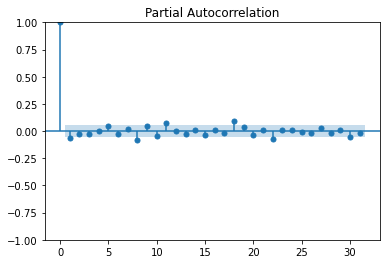

In [112]:
plot_pacf(differenced_data, method='ywm');

## Evaluation

## Results

## Conclusion

## Next Steps